## importing class

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_csv('movies.csv',engine='python')


## Data Wrangling

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.shape

(9837, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [8]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


## data cleaning

### no duplicates

In [9]:
df.duplicated().any()

False

some nan values we dropped it from columns

In [10]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [11]:
df.dropna(subset=['Title'],inplace=True)

In [12]:
df['Title'].isnull().sum()

0

In [13]:
df.shape

(9828, 9)

In [14]:
df.dropna(subset=['Popularity'],inplace=True)

In [15]:
df.dropna(subset=['Genre'],inplace=True)

In [16]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [17]:
df.shape

(9826, 9)

dealing with datatypes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 767.7+ KB


In [19]:
df['Vote_Count'].replace('en',np.nan,inplace=True)

In [20]:
df.dropna(subset=['Vote_Count'],inplace=True)

In [21]:
df['Vote_Count']=pd.to_numeric(df['Vote_Count'])
df['Vote_Count'].dtypes

dtype('int64')

In [22]:
df['Vote_Count']=pd.to_numeric(df['Vote_Count'])
df['Vote_Count'].dtypes

dtype('int64')

In [23]:
df['Vote_Average']=pd.to_numeric(df['Vote_Average'])
df['Vote_Average'].dtypes

dtype('float64')

searching about outliers


In [24]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [27]:
def find_outlier(df):
    q1=df.quantile(0.25)
    
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    dropped=not_outliers.dropna().reset_index()
    return dropped
#find_outlier(df)


## Data Visualization

use boxplot to represent outliers

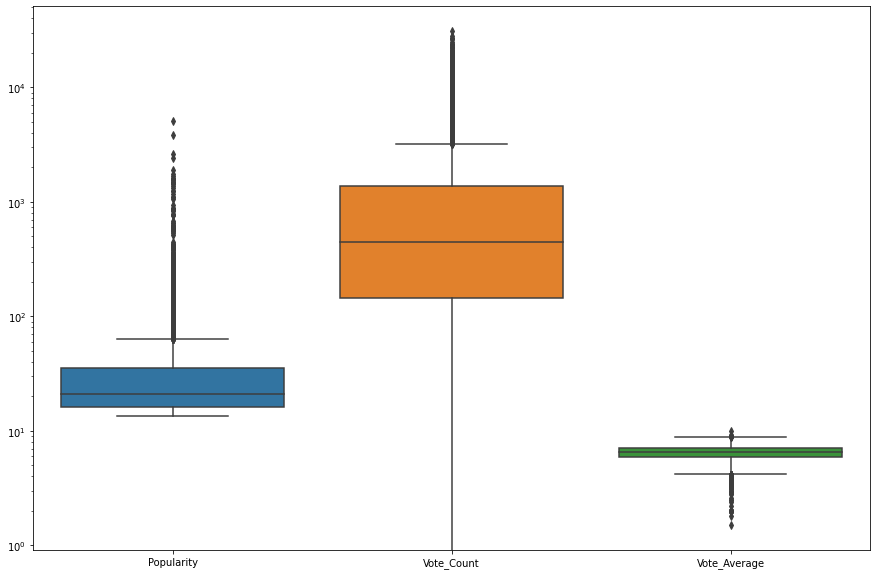

In [28]:
plt.figure(figsize=(15,10))
plt.yscale('log')
sns.boxplot(data=df)

most films types
    
    *to deal with we need to seperate groups of genre which are to one value 
    *then reset index 
    *converting it to cateagory type to be able to plot it

In [29]:
df['Genre']=df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [30]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].unique()

['Action', ' Adventure', ' Science Fiction', 'Crime', ' Mystery', ..., ' TV Movie', 'War', ' Documentary', 'Music', 'History']
Length: 38
Categories (38, object): [' Action', ' Adventure', ' Animation', ' Comedy', ..., 'TV Movie',
                          'Thriller', 'War', 'Western']

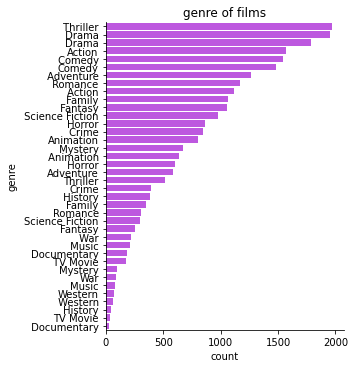

In [31]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#c842f5')
plt.title('genre of films')
plt.ylabel('genre')
plt.xlabel('count')
plt.show()

genre of overrated films

In [32]:
df1=df.drop(df[df['Vote_Average'] < (df['Vote_Average'].describe()['75%'])].index)
df1.shape

(6520, 9)

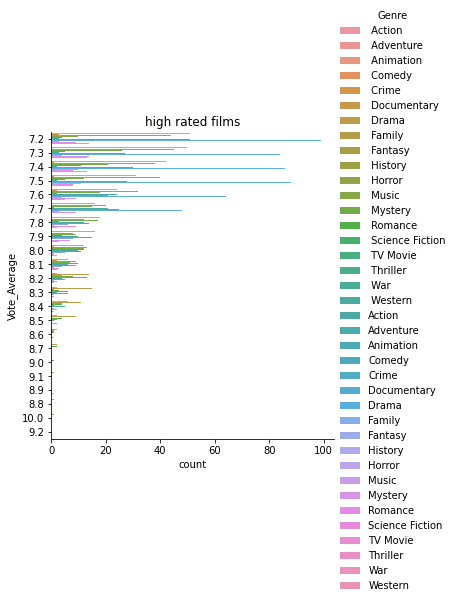

In [33]:
sns.catplot(y='Vote_Average',data=df1,kind='count',order=df1['Vote_Average'].value_counts().index,hue='Genre')
plt.title('high rated films')
plt.ylabel('Vote_Average')
plt.xlabel('count')
plt.show()

find it by code that its top is Drama films 

In [34]:
t=(df['Vote_Average']>=df['Vote_Average'].describe()['75%'])
df[t]['Genre'].describe()

count      6520
unique       38
top       Drama
freq        692
Name: Genre, dtype: object

film which has the highest popularity and its genre

In [35]:
filt=(df['Popularity']==df['Popularity'].max())

In [36]:
df[filt]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


In [37]:
df[filt]['Genre']

0              Action
1           Adventure
2     Science Fiction
Name: Genre, dtype: category
Categories (38, object): [' Action', ' Adventure', ' Animation', ' Comedy', ..., 'TV Movie',
                          'Thriller', 'War', 'Western']

year has the most movies been made

we need to seprate date to extract year 


In [38]:
df['year'] = pd.DatetimeIndex(df['Release_Date']).year

In [39]:
df['year'].head()

0    2021
1    2021
2    2021
3    2022
4    2022
Name: year, dtype: int64

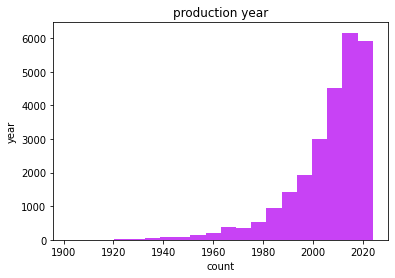

In [40]:
plt.hist(df['year'],bins=20,color='#c842f5')
plt.title('production year')
plt.ylabel('year')
plt.xlabel('count')
plt.show()